In [68]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.impute import SimpleImputer

In [3]:
master = pd.read_csv('input/master.csv')
extra_features = pd.read_csv('input/suicidedataextrafestures.csv')

In [4]:
#Pequeño repaso exploratorio de master
master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
#En esta tabla podemos observar la gran cantidad de datos no relevantes para el estudio, además de tener pocos indicadores con los que buscar correlaciones.
master.shape

(27820, 12)

In [6]:
master.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
#se observa como el nombre de las columnas es lioso
def clean_column(df):
    cols = df.columns
    new_column_names = []

    for col in cols:
        new_col = col.lstrip().rstrip().lower().replace (" ", "_") #strip beginning spaces, makes lowercase, add underscpre
        new_column_names.append(new_col)

    df.columns = new_column_names

In [8]:
clean_column(master)

In [9]:
master.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'hdi_for_year', 'gdp_for_year_($)',
       'gdp_per_capita_($)', 'generation'],
      dtype='object')

In [10]:
#También vemos como GDP tiene ',' entre los números, hay que eliminarlo
master['gdp_for_year_($)'] = master.apply(lambda x: float(x['gdp_for_year_($)'].replace(',', '')), axis=1)

In [11]:
master['gdp_for_year_($)']

0        2.156625e+09
1        2.156625e+09
2        2.156625e+09
3        2.156625e+09
4        2.156625e+09
             ...     
27815    6.306708e+10
27816    6.306708e+10
27817    6.306708e+10
27818    6.306708e+10
27819    6.306708e+10
Name: gdp_for_year_($), Length: 27820, dtype: float64

In [12]:
#Ahora hay que examinar extra_features, datos del WDI que enriquecen el dataset en el periodo 1995-2013

In [13]:
extra_features.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
set([str(i) for i in extra_features['year']])

{'1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016'}

In [15]:
extra_features.shape

(15110, 26)

In [16]:
extra_features.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100k', 'country-year', 'yearlyHDI', 'GDPpyear',
       'GDPpcapital', 'generation', 'suicide%',
       'Individuals using the Internet (% of population)',
       'Expense (% of GDP)', 'Compensation of employees (% of expense)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Physicians (per 1,000 people)',
       'Strength of legal rights index (0=weak to 12=strong)',
       'Labor force, total', 'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Refugee population by country or territory of origin',
       'Contributing family workers, total (% of total employment) (modeled ILO estimate)',
       'Access to electricity (% of population)',
       'Lower secondary completion rate, total (% of relevant age group)'],
      dtype='object')

In [17]:
clean_column(extra_features)

In [18]:
extra_features.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100k', 'country-year', 'yearlyhdi', 'gdppyear',
       'gdppcapital', 'generation', 'suicide%',
       'individuals_using_the_internet_(%_of_population)',
       'expense_(%_of_gdp)', 'compensation_of_employees_(%_of_expense)',
       'unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)',
       'physicians_(per_1,000_people)',
       'strength_of_legal_rights_index_(0=weak_to_12=strong)',
       'labor_force,_total', 'life_expectancy_at_birth,_total_(years)',
       'mobile_cellular_subscriptions_(per_100_people)',
       'refugee_population_by_country_or_territory_of_origin',
       'contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)',
       'access_to_electricity_(%_of_population)',
       'lower_secondary_completion_rate,_total_(%_of_relevant_age_group)'],
      dtype='object')

In [19]:
#El siguiente paso sería unir la informacion que nos interesa y flitrar la tabla por datos que podamos trabajar

In [20]:
countries = [i for i in extra_features['country']]
print(list(dict.fromkeys(countries)))
len(list(dict.fromkeys(countries)))


['Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Croatia', 'Cuba', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Mexico', 'Mongolia', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'Turkmenistan', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan']


48

In [21]:
#let's reduce this list to 40, thus it would ve more insightful 
country_list = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

In [55]:
data1 = extra_features.copy()
data = data1.iloc[np.where(data1.country == country_list[0])]
for i, x in enumerate(country_list[1:]):
    data = data.append(data1.iloc[np.where(data1.country == x)])

data = data[data.year >= 2000]
data = data[data.year <= 2019]
data = data.reset_index()

In [56]:
display(data.head())

,index,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyhdi,...,"unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)","physicians_(per_1,000_people)",strength_of_legal_rights_index_(0=weak_to_12=strong),"labor_force,_total","life_expectancy_at_birth,_total_(years)",mobile_cellular_subscriptions_(per_100_people),refugee_population_by_country_or_territory_of_origin,"contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)",access_to_electricity_(%_of_population),"lower_secondary_completion_rate,_total_(%_of_relevant_age_group)"
0,180,Argentina,2000,male,75+ years,232,525161,44.18,Argentina2000,0.762,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104
1,181,Argentina,2000,male,55-74 years,602,2333377,25.80,Argentina2000,0.762,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104
2,182,Argentina,2000,male,35-54 years,578,4096814,14.11,Argentina2000,0.762,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104
3,183,Argentina,2000,male,15-24 years,463,3306109,14.00,Argentina2000,0.762,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104
4,184,Argentina,2000,male,25-34 years,331,2602314,12.72,Argentina2000,0.762,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104


In [100]:
data.columns

Index(['index', 'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100k', 'country-year', 'yearlyhdi', 'gdppyear',
       'gdppcapital', 'generation', 'suicide%',
       'individuals_using_the_internet_(%_of_population)',
       'expense_(%_of_gdp)', 'compensation_of_employees_(%_of_expense)',
       'unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)',
       'physicians_(per_1,000_people)',
       'strength_of_legal_rights_index_(0=weak_to_12=strong)',
       'labor_force,_total', 'life_expectancy_at_birth,_total_(years)',
       'mobile_cellular_subscriptions_(per_100_people)',
       'refugee_population_by_country_or_territory_of_origin',
       'contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)',
       'access_to_electricity_(%_of_population)',
       'lower_secondary_completion_rate,_total_(%_of_relevant_age_group)'],
      dtype='object')

In [103]:
for i in data[['suicides_no', 'population',
       'suicidesper100k', 'yearlyhdi', 'gdppyear',
       'gdppcapital', 'suicide%',
       'individuals_using_the_internet_(%_of_population)',
       'expense_(%_of_gdp)', 'compensation_of_employees_(%_of_expense)',
       'unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)',
       'physicians_(per_1,000_people)',
       'strength_of_legal_rights_index_(0=weak_to_12=strong)',
       'labor_force,_total', 'life_expectancy_at_birth,_total_(years)',
       'mobile_cellular_subscriptions_(per_100_people)',
       'refugee_population_by_country_or_territory_of_origin',
       'contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)',
       'access_to_electricity_(%_of_population)',
       'lower_secondary_completion_rate,_total_(%_of_relevant_age_group)']]:
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        data[i] = imputer.fit_transform(data[i].values.reshape(-1,1))[:,0]
        data[i]

In [104]:
data.head()

,index,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyhdi,...,"unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)","physicians_(per_1,000_people)",strength_of_legal_rights_index_(0=weak_to_12=strong),"labor_force,_total","life_expectancy_at_birth,_total_(years)",mobile_cellular_subscriptions_(per_100_people),refugee_population_by_country_or_territory_of_origin,"contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)",access_to_electricity_(%_of_population),"lower_secondary_completion_rate,_total_(%_of_relevant_age_group)"
0,180.0,Argentina,2000,male,75+ years,232.0,525161.0,44.18,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
1,181.0,Argentina,2000,male,55-74 years,602.0,2333377.0,25.80,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
2,182.0,Argentina,2000,male,35-54 years,578.0,4096814.0,14.11,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
3,183.0,Argentina,2000,male,15-24 years,463.0,3306109.0,14.00,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
4,184.0,Argentina,2000,male,25-34 years,331.0,2602314.0,12.72,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104


In [105]:
display(data['country'].value_counts())

Austria               202
Netherlands           202
Czech Republic        202
Croatia               202
Iceland               202
Romania               202
Sweden                202
Hungary               202
Greece                192
Norway                192
Colombia              192
Russian Federation    192
Cuba                  192
Italy                 192
United States         192
Denmark               192
Finland               192
Chile                 192
Germany               192
South Africa          192
Argentina             192
Poland                192
Spain                 192
Mexico                192
Belgium               192
United Kingdom        192
Israel                192
Switzerland           192
Turkmenistan          192
Japan                 192
Brazil                192
Thailand              190
France                180
Australia             180
Ireland               180
Ukraine               180
Bulgaria              180
Armenia               178
New Zealand 

In [53]:
data.describe()

,year,suicides_no,population,suicidesper100k,yearlyhdi,gdppyear,gdppcapital,suicide%,individuals_using_the_internet_(%_of_population),expense_(%_of_gdp),...,"unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)","physicians_(per_1,000_people)",strength_of_legal_rights_index_(0=weak_to_12=strong),"labor_force,_total","life_expectancy_at_birth,_total_(years)",mobile_cellular_subscriptions_(per_100_people),refugee_population_by_country_or_territory_of_origin,"contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)",access_to_electricity_(%_of_population),"lower_secondary_completion_rate,_total_(%_of_relevant_age_group)"
count,7780.000000,7780.000000,7.780000e+03,7780.000000,3264.000000,7.780000e+03,7780.000000,7780.000000,7744.000000,7060.000000,...,7780.000000,5920.000000,1444.000000,7.780000e+03,7780.000000,7780.000000,7744.000000,7780.000000,7768.000000,4216.000000
mean,2007.546015,424.581234,3.276760e+06,12.997158,0.833750,1.041639e+12,27761.603856,0.012997,41.063465,27.499204,...,7.187187,2.579729,1.770083,1.789845e+07,66.942175,76.287230,12468.883264,2.431205,86.428748,70.903477
std,4.647333,1216.337449,5.284430e+06,16.045244,0.079475,2.341339e+12,22080.859135,0.016045,30.554658,14.194576,...,5.503167,1.594820,2.960548,2.856915e+07,26.009859,46.511036,52252.716426,4.480029,33.146543,40.038536
min,2000.000000,0.000000,5.879000e+03,0.000000,0.613000,1.911564e+09,530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,20.000000,4.898028e+05,2.260000,0.775750,1.307060e+11,8044.000000,0.002262,10.921800,18.621626,...,4.000000,1.715150,0.000000,2.393487e+06,72.112000,38.077811,12.000000,0.280000,98.526625,71.508260
50%,2008.000000,87.000000,1.157754e+06,7.520000,0.865000,2.913830e+11,23673.000000,0.007517,40.350916,30.985698,...,6.817000,2.888800,0.000000,5.077237e+06,77.487805,87.363265,114.000000,0.734000,100.000000,90.795280
75%,2012.000000,295.250000,3.878948e+06,17.795000,0.896250,8.666800e+11,44585.000000,0.017797,68.931193,38.216734,...,9.285000,3.635400,4.000000,2.166624e+07,80.151220,112.422595,1537.000000,2.348000,100.000000,97.809910
max,2016.000000,21262.000000,4.380521e+07,144.150000,0.944000,1.812070e+13,109804.000000,0.144155,96.546800,62.186783,...,33.473000,7.334100,12.000000,1.588311e+08,83.331951,172.121808,551744.000000,26.936001,100.000000,116.367400


In [106]:
data.tail

<bound method NDFrame.tail of         index        country  year     sex          age  suicides_no  \
0       180.0      Argentina  2000    male    75+ years        232.0   
1       181.0      Argentina  2000    male  55-74 years        602.0   
2       182.0      Argentina  2000    male  35-54 years        578.0   
3       183.0      Argentina  2000    male  15-24 years        463.0   
4       184.0      Argentina  2000    male  25-34 years        331.0   
...       ...            ...   ...     ...          ...          ...   
7775  14841.0  United States  2015  female  25-34 years       1444.0   
7776  14842.0  United States  2015  female  15-24 years       1132.0   
7777  14843.0  United States  2015  female    75+ years        540.0   
7778  14844.0  United States  2015    male   5-14 years        255.0   
7779  14845.0  United States  2015  female   5-14 years        158.0   

      population  suicidesper100k       country-year  yearlyhdi  ...  \
0       525161.0            44.18

In [109]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['index', 'year', 'suicides_no', 'population', 'suicidesper100k',
       'yearlyhdi', 'gdppyear', 'gdppcapital', 'suicide%',
       'individuals_using_the_internet_(%_of_population)',
       'expense_(%_of_gdp)', 'compensation_of_employees_(%_of_expense)',
       'unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)',
       'physicians_(per_1,000_people)',
       'strength_of_legal_rights_index_(0=weak_to_12=strong)',
       'labor_force,_total', 'life_expectancy_at_birth,_total_(years)',
       'mobile_cellular_subscriptions_(per_100_people)',
       'refugee_population_by_country_or_territory_of_origin',
       'contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)',
       'access_to_electricity_(%_of_population)',
       'lower_secondary_completion_rate,_total_(%_of_relevant_age_group)'],
      dtype='object')

In [110]:
numeric_features.head()

,index,year,suicides_no,population,suicidesper100k,yearlyhdi,gdppyear,gdppcapital,suicide%,individuals_using_the_internet_(%_of_population),...,"unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)","physicians_(per_1,000_people)",strength_of_legal_rights_index_(0=weak_to_12=strong),"labor_force,_total","life_expectancy_at_birth,_total_(years)",mobile_cellular_subscriptions_(per_100_people),refugee_population_by_country_or_territory_of_origin,"contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)",access_to_electricity_(%_of_population),"lower_secondary_completion_rate,_total_(%_of_relevant_age_group)"
0,180.0,2000,232.0,525161.0,44.18,0.762,2.842040e+11,8462.0,0.044177,7.038683,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
1,181.0,2000,602.0,2333377.0,25.80,0.762,2.842040e+11,8462.0,0.025800,7.038683,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
2,182.0,2000,578.0,4096814.0,14.11,0.762,2.842040e+11,8462.0,0.014109,7.038683,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
3,183.0,2000,463.0,3306109.0,14.00,0.762,2.842040e+11,8462.0,0.014004,7.038683,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
4,184.0,2000,331.0,2602314.0,12.72,0.762,2.842040e+11,8462.0,0.012719,7.038683,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104


In [111]:
#Es importante saber que columnas proporcionan información acerca de variables temporales
year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'year' in feature]
year_feature

['year', 'yearlyhdi', 'gdppyear', 'life_expectancy_at_birth,_total_(years)']

In [112]:
#Numero de variables discretas que hay en el dataset(aqellas que no aceptan cualquier valor)
discrete_feature=[feature for feature in numeric_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [113]:
data[discrete_feature].head()

,strength_of_legal_rights_index_(0=weak_to_12=strong)
0,1.770083
1,1.770083
2,1.770083
3,1.770083
4,1.770083


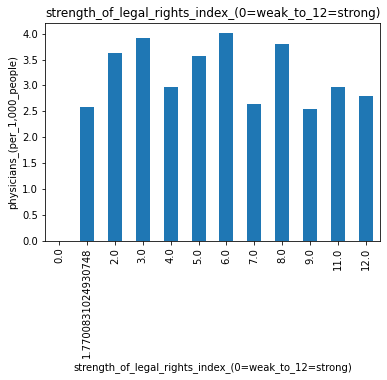

In [115]:
for feature in discrete_feature:
    data2=data.copy()
    data2.groupby(feature)['physicians_(per_1,000_people)'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('physicians_(per_1,000_people)')
    plt.title(feature)
    plt.show()

In [116]:
data.isnull().sum()

index                                                                                0
country                                                                              0
year                                                                                 0
sex                                                                                  0
age                                                                                  0
suicides_no                                                                          0
population                                                                           0
suicidesper100k                                                                      0
country-year                                                                         0
yearlyhdi                                                                            0
gdppyear                                                                             0
gdppcapital                                

In [117]:
#variables continuas
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

Continuous Feature Count 17


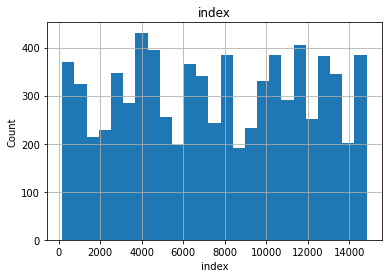

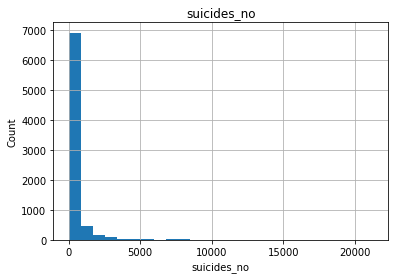

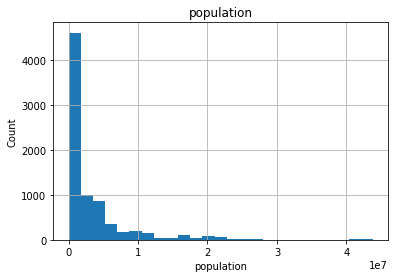

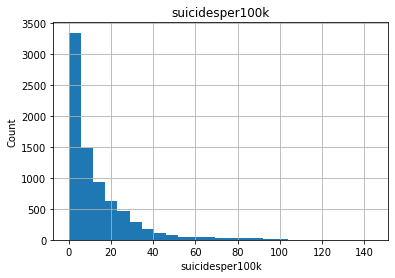

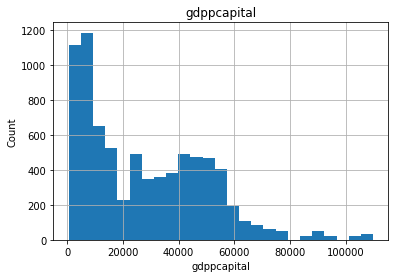

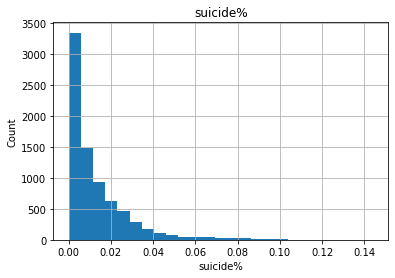

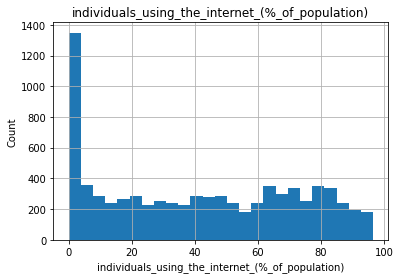

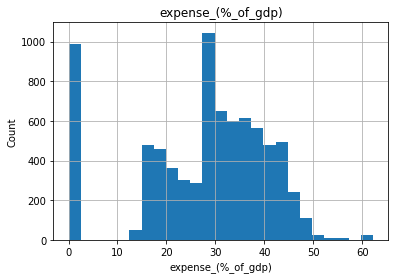

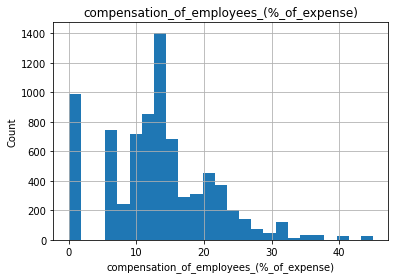

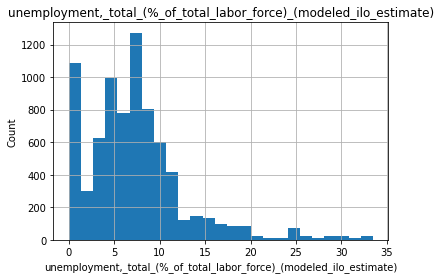

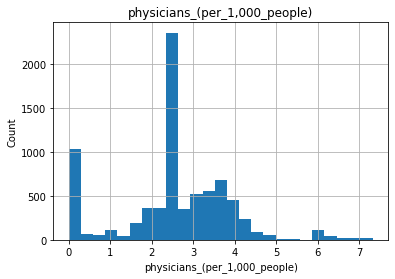

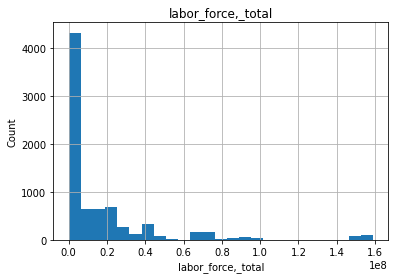

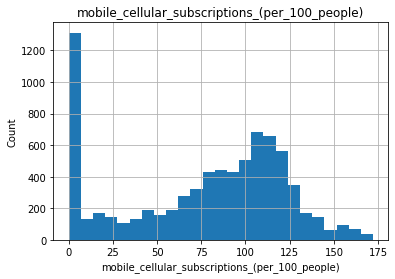

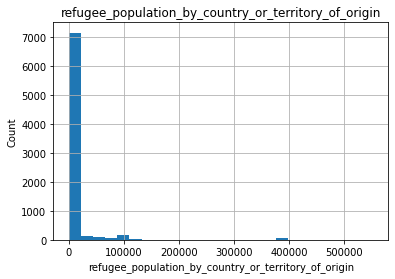

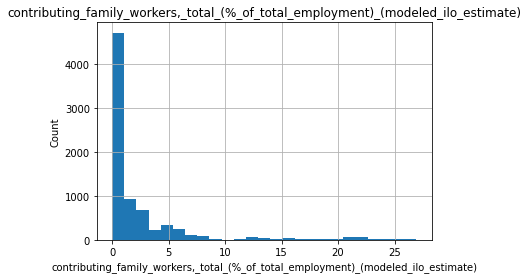

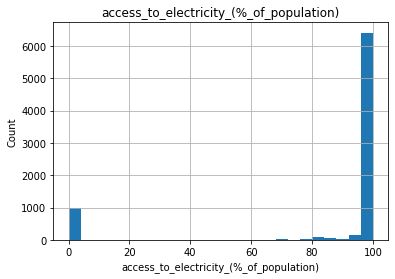

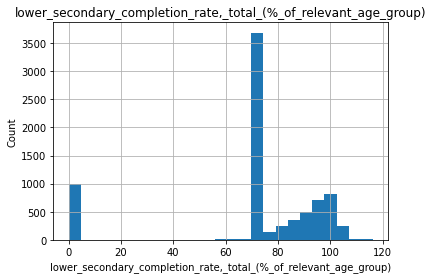

In [118]:
for feature in continuous_feature:
    data3=data.copy()
    data3[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [119]:
#Variables categoricas
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['country', 'sex', 'age', 'country-year', 'generation'], dtype='object')

<AxesSubplot:>

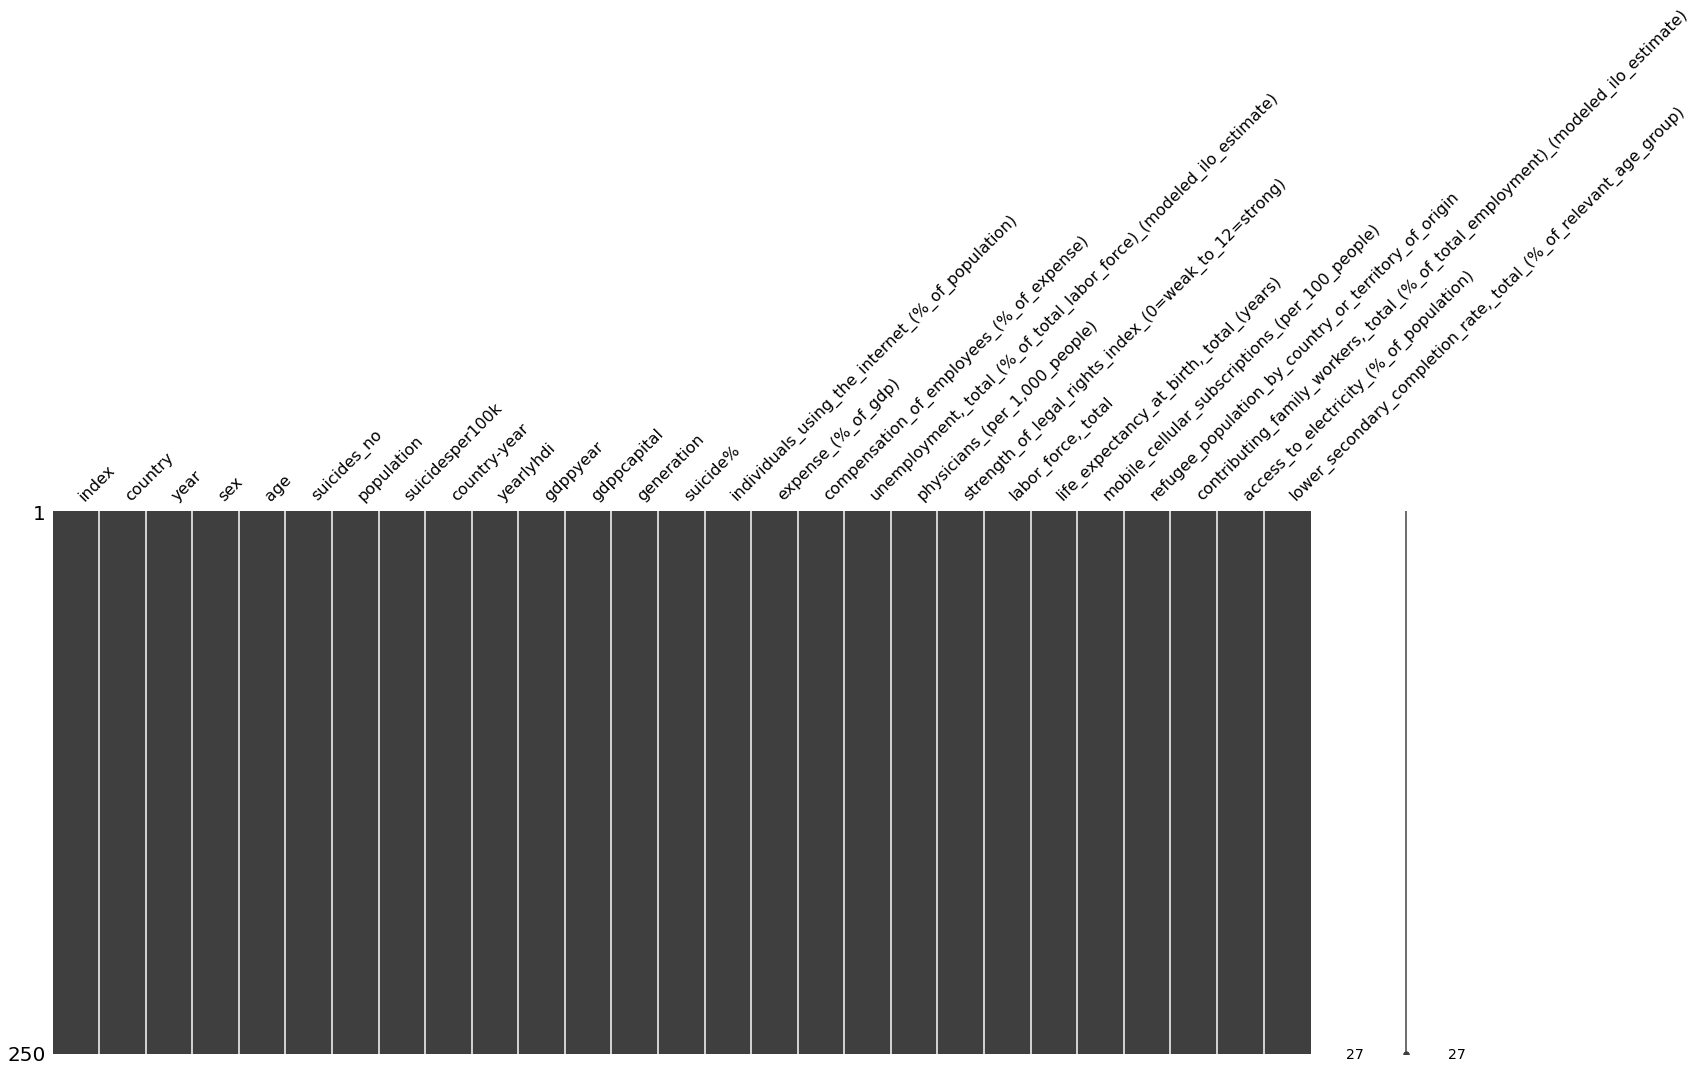

In [120]:
import missingno as msno
msno.matrix(data.sample(250))

/usr/local/lib/python3.8/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.8/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

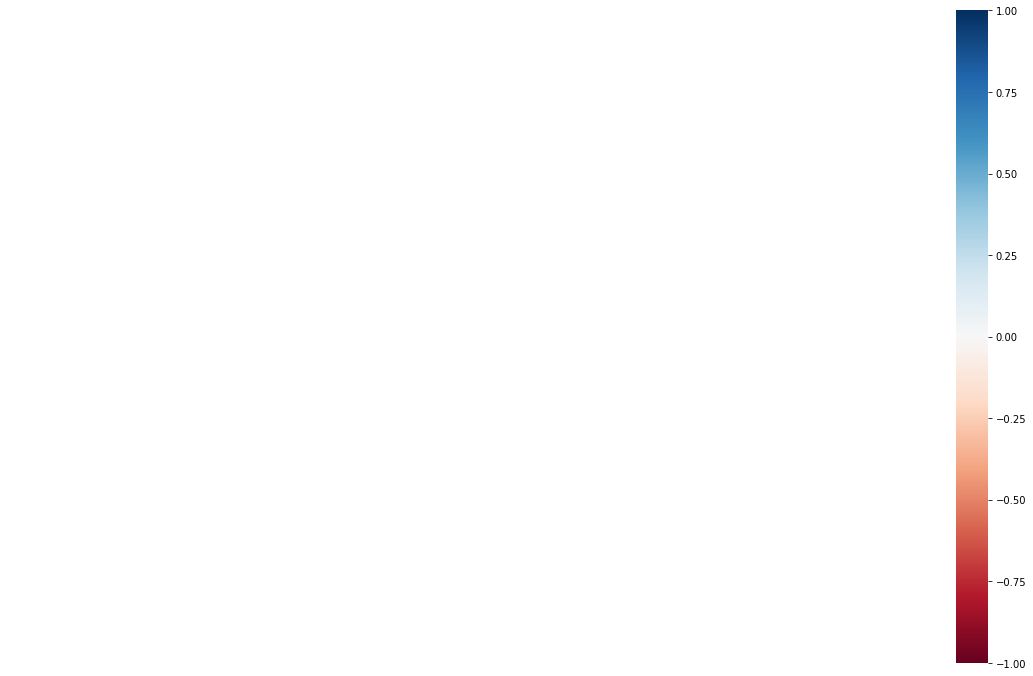

In [121]:
#heatmap. Es un tipo especial de matriz de correlación en la que muestra cuanto afecta la presencia o ausencia
#de una variable a la presencia de otra
msno.heatmap(data)

In [122]:
#skewness y kurtosis
data.skew(), data.kurt()

(index                                                                               -0.023080
 year                                                                                 0.005360
 suicides_no                                                                          7.241697
 population                                                                           3.445323
 suicidesper100k                                                                      2.473000
 yearlyhdi                                                                           -1.209167
 gdppyear                                                                             4.797553
 gdppcapital                                                                          0.802391
 suicide%                                                                             2.473007
 individuals_using_the_internet_(%_of_population)                                     0.098871
 expense_(%_of_gdp)                               

<AxesSubplot:title={'center':'Log Normal'}, xlabel='suicidesper100k'>

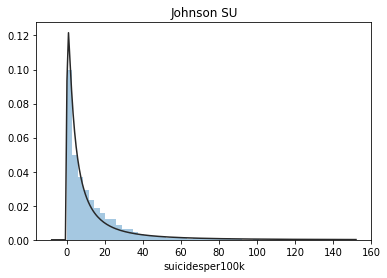

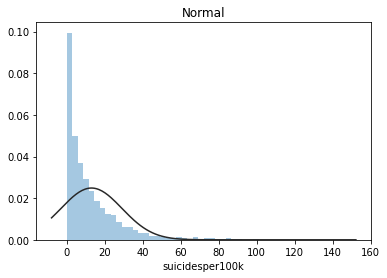

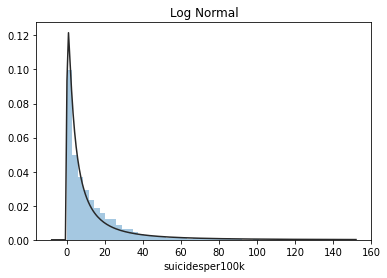

In [123]:
#se puede observar que suicidesper100k no sigue una distribución normal, por lo que seguramente habrá que noramlizarla
y = data['suicidesper100k']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

<AxesSubplot:xlabel='Skewness'>

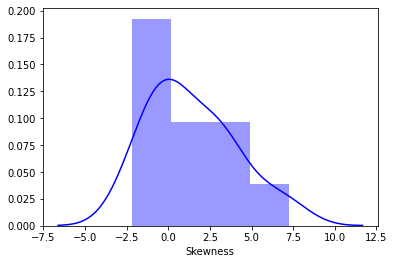

In [124]:
sns.distplot(data.skew(),color='blue',axlabel ='Skewness')

<AxesSubplot:xlabel='Kurtosis'>

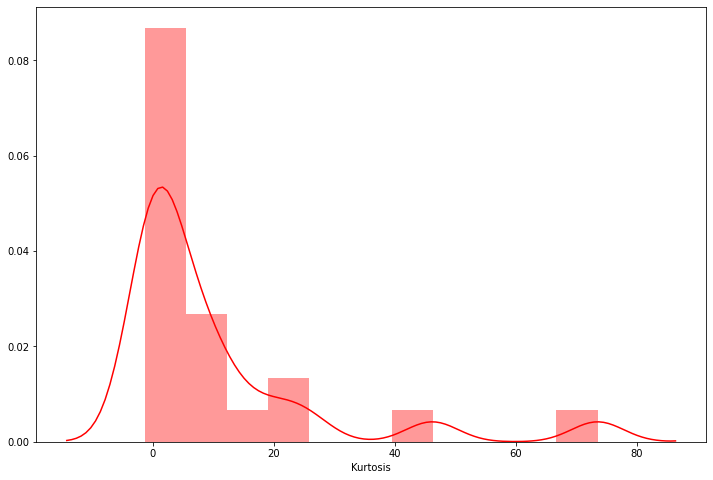

In [125]:
plt.figure(figsize = (12,8))
sns.distplot(data.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)

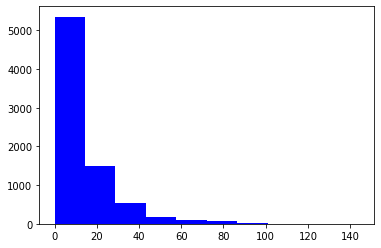

In [126]:
plt.hist(data['suicidesper100k'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

In [127]:
#hayar la correlacióin entre suicidesper100k y los datos
correlation = numeric_features.corr()
print(correlation['suicidesper100k'].sort_values(ascending = False),'\n')

suicidesper100k                                                                      1.000000
suicide%                                                                             1.000000
suicides_no                                                                          0.392230
physicians_(per_1,000_people)                                                        0.072289
yearlyhdi                                                                            0.061241
refugee_population_by_country_or_territory_of_origin                                 0.059407
expense_(%_of_gdp)                                                                   0.047901
access_to_electricity_(%_of_population)                                              0.042597
lower_secondary_completion_rate,_total_(%_of_relevant_age_group)                     0.042216
life_expectancy_at_birth,_total_(years)                                              0.030981
individuals_using_the_internet_(%_of_population)            

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

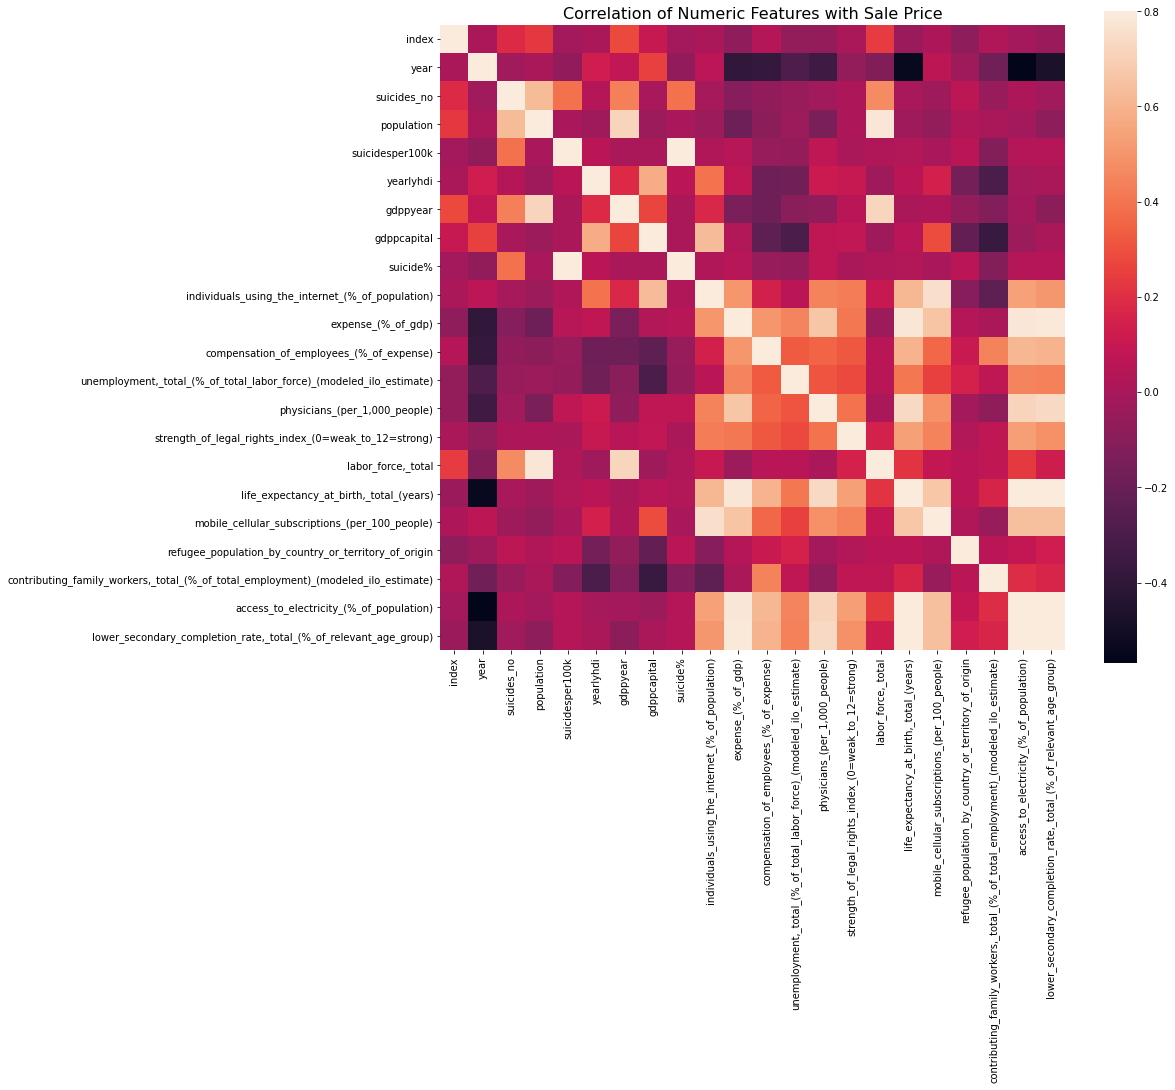

In [128]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

Index(['suicidesper100k', 'suicide%', 'suicides_no',
       'physicians_(per_1,000_people)', 'yearlyhdi',
       'refugee_population_by_country_or_territory_of_origin',
       'expense_(%_of_gdp)', 'access_to_electricity_(%_of_population)',
       'lower_secondary_completion_rate,_total_(%_of_relevant_age_group)',
       'life_expectancy_at_birth,_total_(years)',
       'individuals_using_the_internet_(%_of_population)'],
      dtype='object')


<AxesSubplot:>

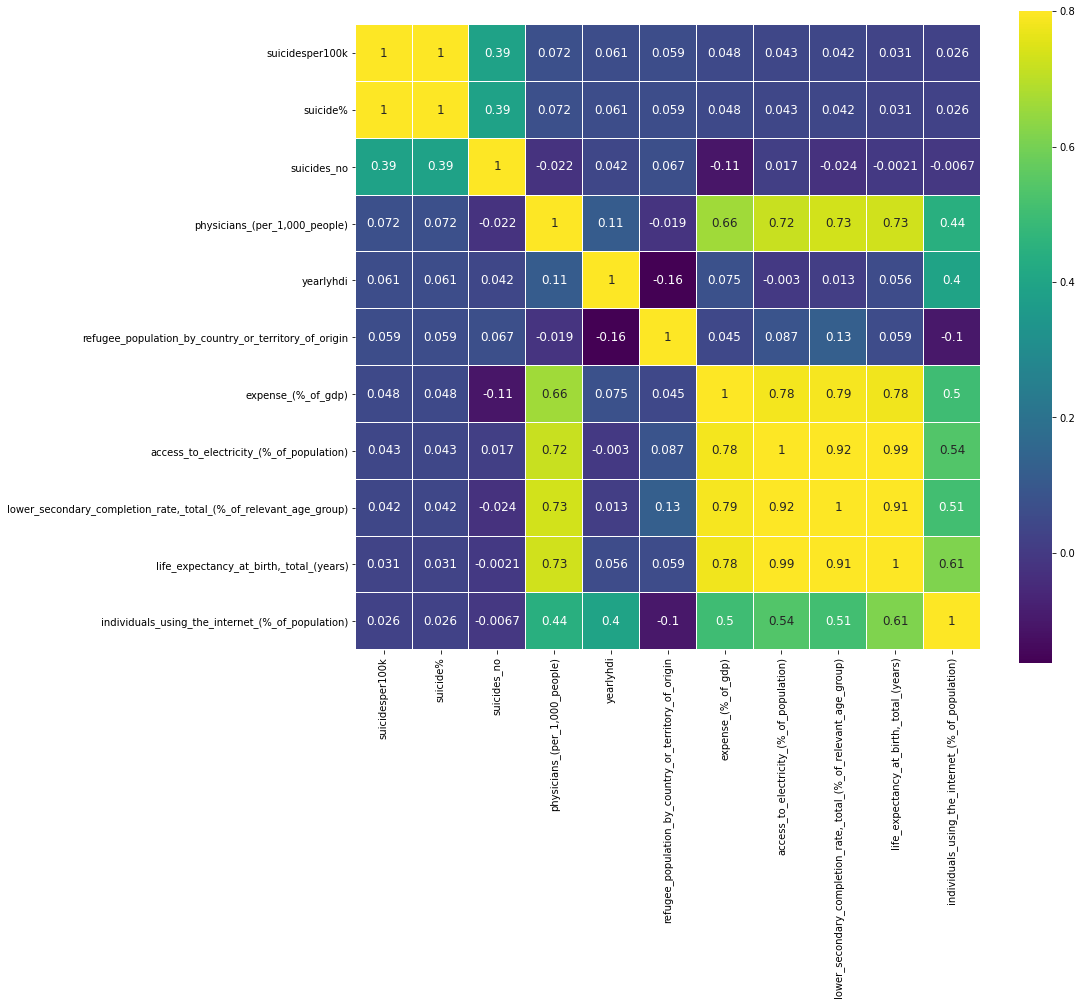

In [129]:
k= 11
cols = correlation.nlargest(k,'suicidesper100k')['suicidesper100k'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


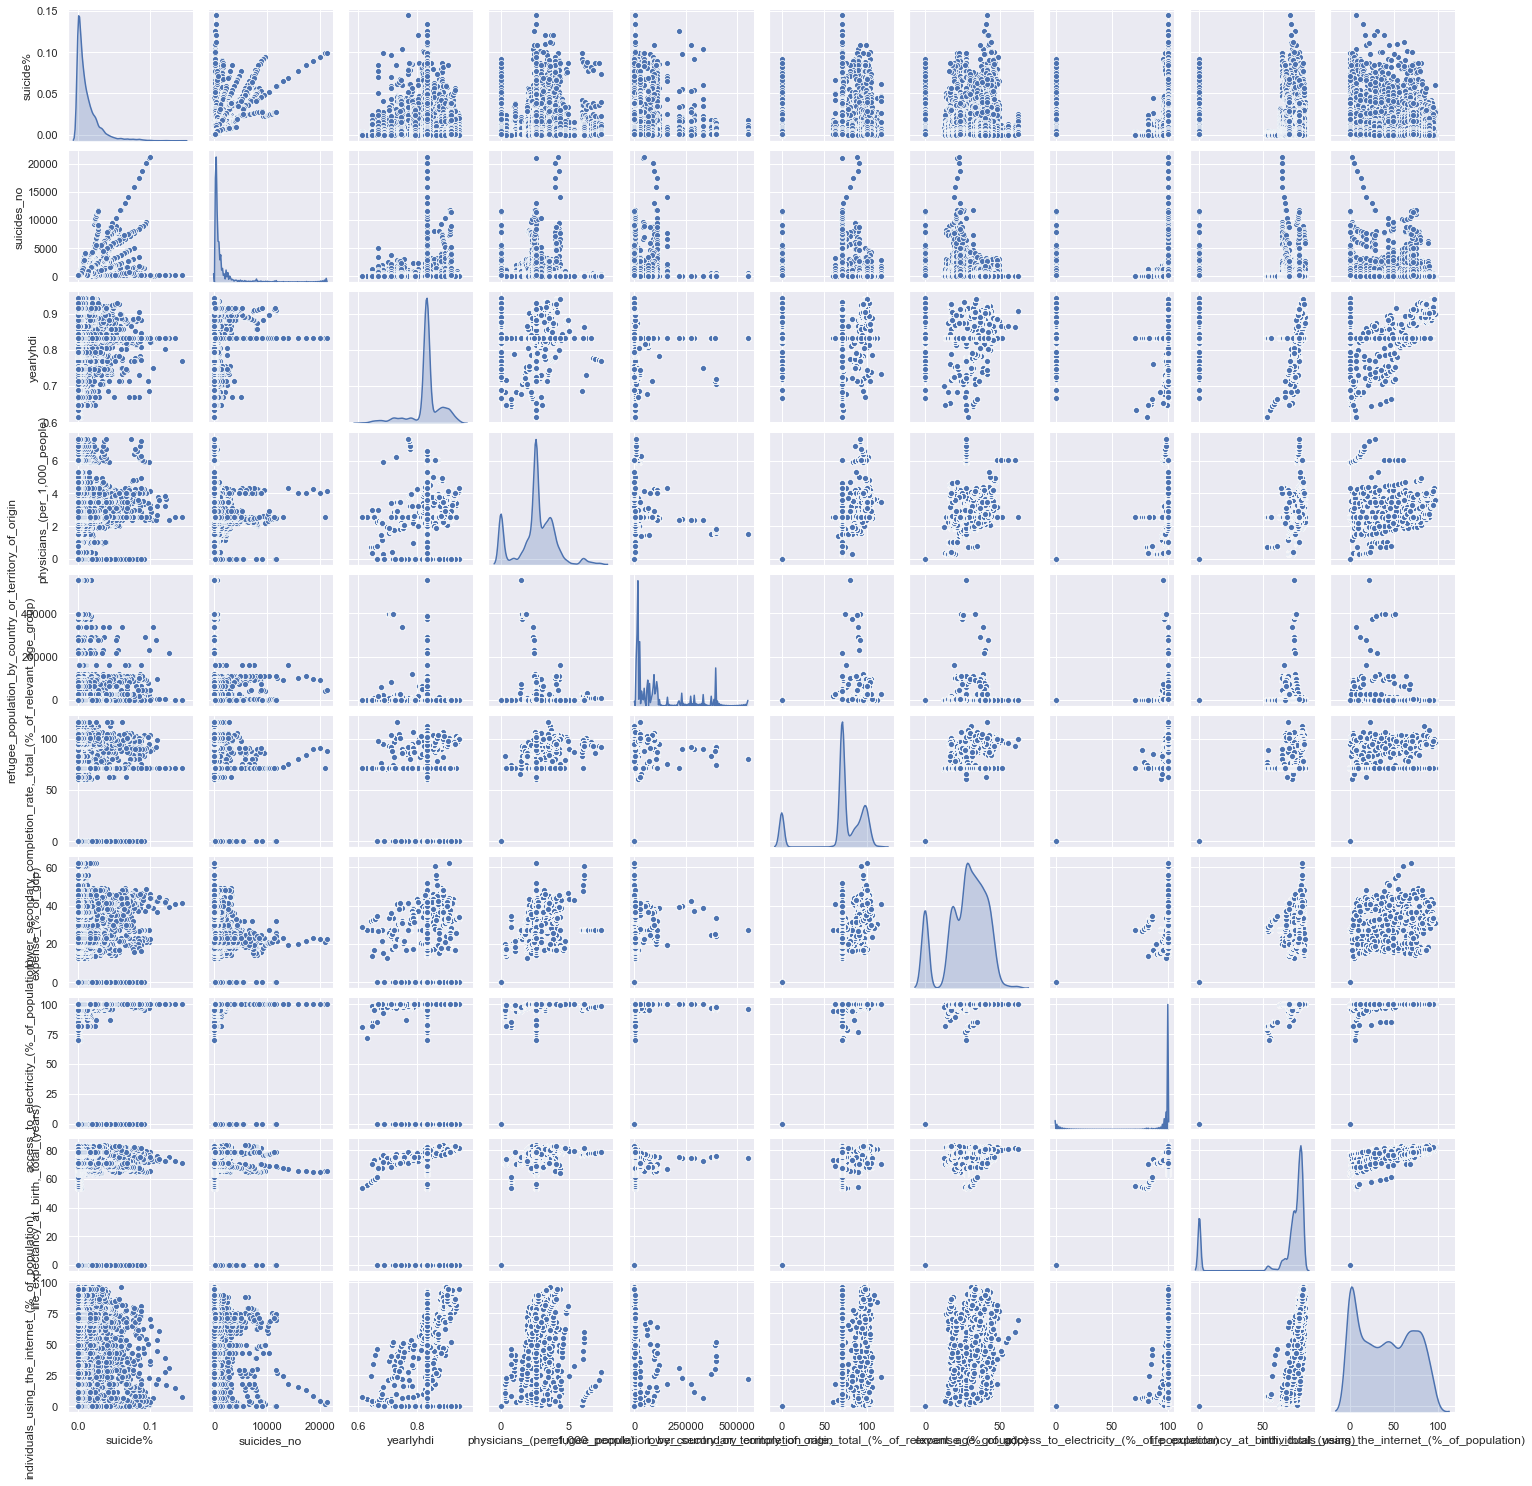

In [130]:
#pairplot entre suicidesper100k y las variables correlacionadas
sns.set()
columns = ['suicide%', 'suicides_no', 'yearlyhdi',
       'physicians_(per_1,000_people)',
       'refugee_population_by_country_or_territory_of_origin',
       'lower_secondary_completion_rate,_total_(%_of_relevant_age_group)',
       'expense_(%_of_gdp)', 'access_to_electricity_(%_of_population)',
       'life_expectancy_at_birth,_total_(years)',
       'individuals_using_the_internet_(%_of_population)']
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

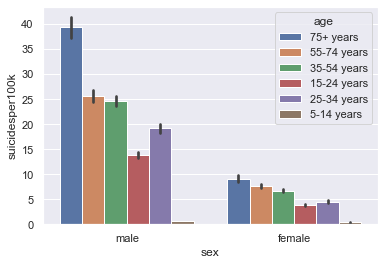

In [134]:
ages = sns.barplot(x='sex', y='suicidesper100k', hue='age', data=data)

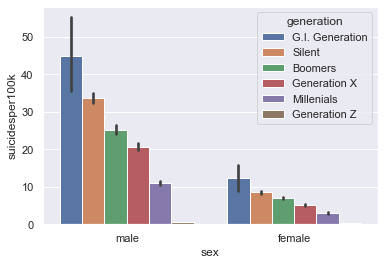

In [135]:
gens = sns.barplot(x='sex', y='suicidesper100k', hue='generation', data=data)

In [136]:
import plotly.graph_objs as go
go.Figure(data=[go.Pie(labels=data['age'],values=data['suicidesper100k'],
                       title='Suicide Rate per Age Category')])

In [137]:
go.Figure(data=[go.Pie(labels=data['sex'],values=data['suicidesper100k'],
                       title='Suicide Rate per Age Category')])

In [138]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [139]:
#suicides per country and 100k
suicides = data.groupby('country').suicides_no.sum().sort_values(ascending=False)
suicides.iplot(kind='line',color='red',title='suicides per country and 100k',xTitle='Countries',yTitle='Suicide Counts')

In [140]:
#suicides per year
data.groupby('year').suicidesper100k.sum().iplot(kind='line',title='Suicides per Year 2000 to 2016',
                                                xTitle='Year',yTitle='Suicide Counts')

In [141]:
youth = data[data['age']=='15-24 years']
youth.groupby('year').suicidesper100k.sum().iplot(kind='line',title='Suicides per Year 2000 to 2016',
                                                xTitle='Year',yTitle='Suicide Counts')

In [142]:
youth_suicides = youth.groupby('country').suicidesper100k.sum().sort_values(ascending=False)

In [143]:
data2 = dict(type='choropleth',
           locations = youth_suicides.index,
           locationmode = 'country names',
           z = youth_suicides[:],
           colorscale = 'viridis',
           colorbar = {'title':'Suicides per 100k across the period'},
           text = youth_suicides.index)
# Layout Object
layout = dict(geo = dict(projection={'type':'orthographic'},showframe=False),title='Youth suicide around the World')
# Plotting
choromap = go.Figure(data = [data2],layout = layout)
iplot(choromap,validate=False)

In [146]:
age_15 = data.loc[data.loc[:, 'age']=='15-24 years',:]
age_35 = data.loc[data.loc[:, 'age']=='35-54 years',:]
age_75 = data.loc[data.loc[:, 'age']=='75+ years',:]
age_25 = data.loc[data.loc[:, 'age']=='25-34 years',:]
age_55 = data.loc[data.loc[:, 'age']=='55-74 years',:]
age_5 = data.loc[data.loc[:, 'age']=='5-14 years',:]

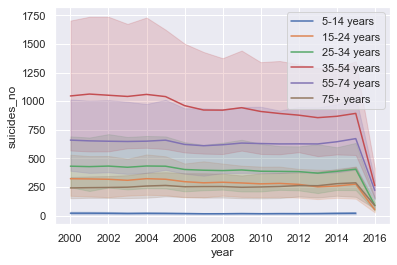

In [147]:
p = sns.lineplot(x='year', y='suicides_no', data=age_5)
q = sns.lineplot(x='year', y='suicides_no', data=age_15)
r = sns.lineplot(x='year', y='suicides_no', data=age_25)
s = sns.lineplot(x='year', y='suicides_no', data=age_35)
t = sns.lineplot(x='year', y='suicides_no', data=age_55)
t = sns.lineplot(x='year', y='suicides_no', data=age_75)

_ = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

# PREDICTION 

In [148]:
from sklearn import preprocessing

le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le_sex=le1.fit(data.sex)
le_age=le2.fit(data.age)
le_country=le3.fit(data.country)

data.sex = le_sex.transform(data.sex) # female:0 , male:1
data.age = le_age.transform(data.age) # 15-24: 0, 25-34:1, 35-54:2 , 5-14:3, 55-74:4, 75+:5
data.country=le_country.transform(data.country)
data.head()

,index,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyhdi,...,"unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)","physicians_(per_1,000_people)",strength_of_legal_rights_index_(0=weak_to_12=strong),"labor_force,_total","life_expectancy_at_birth,_total_(years)",mobile_cellular_subscriptions_(per_100_people),refugee_population_by_country_or_territory_of_origin,"contributing_family_workers,_total_(%_of_total_employment)_(modeled_ilo_estimate)",access_to_electricity_(%_of_population),"lower_secondary_completion_rate,_total_(%_of_relevant_age_group)"
0,180.0,0,2000,1,5,232.0,525161.0,44.18,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
1,181.0,0,2000,1,4,602.0,2333377.0,25.80,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
2,182.0,0,2000,1,2,578.0,4096814.0,14.11,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
3,183.0,0,2000,1,0,463.0,3306109.0,14.00,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104
4,184.0,0,2000,1,1,331.0,2602314.0,12.72,Argentina2000,0.762,...,15.0,2.579729,1.770083,16446835.0,73.576,17.596451,609.0,1.154,86.428748,85.19104


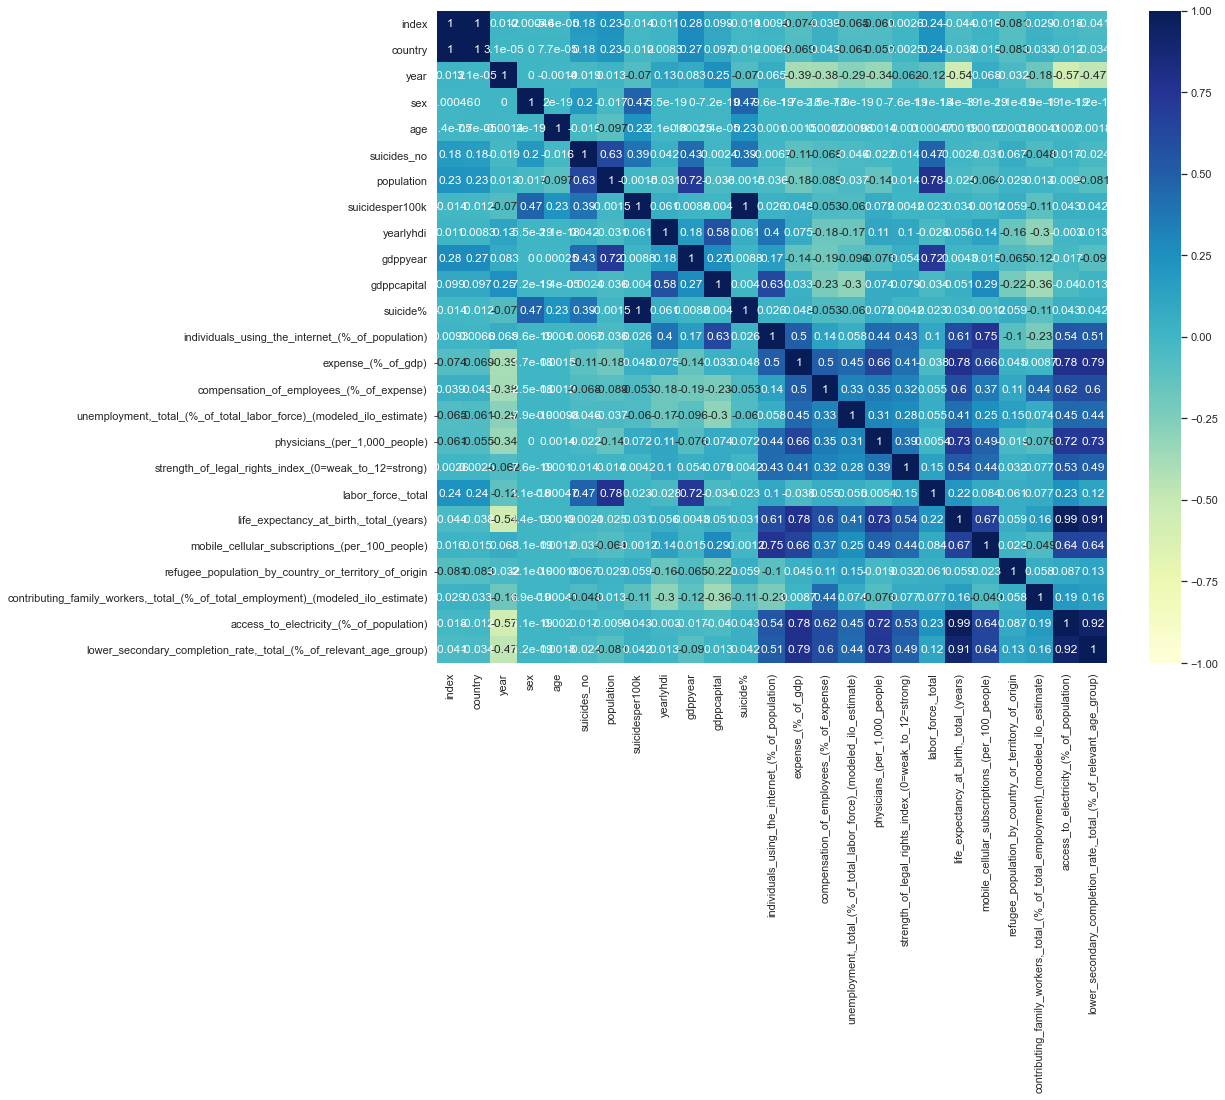

In [150]:
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")

In [152]:
y=data['suicides_no']

X=data[['physicians_(per_1,000_people)', 'yearlyhdi',
       'refugee_population_by_country_or_territory_of_origin',
       'expense_(%_of_gdp)', 'access_to_electricity_(%_of_population)',
       'lower_secondary_completion_rate,_total_(%_of_relevant_age_group)',
       'life_expectancy_at_birth,_total_(years)',
       'individuals_using_the_internet_(%_of_population)']]

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=434)

In [212]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [213]:
testing =[]
training=[]

In [214]:
from sklearn.metrics import r2_score
y_pred_testing=reg.predict(x_test)
y_pred2=reg.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.07414452250359538
Testing score 0.10594565209555629


In [215]:
from sklearn.tree import DecisionTreeRegressor
r=DecisionTreeRegressor()
r.fit(x_train,y_train)

DecisionTreeRegressor()

In [216]:
y_pred_testing=r.predict(x_test)
y_pred2=r.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.3733228447617788
Testing score 0.3281985030256166


In [217]:
from sklearn.ensemble import BaggingRegressor
bagging=BaggingRegressor()
bagging.fit(x_train,y_train)

BaggingRegressor()

In [218]:
y_pred_testing=bagging.predict(x_test)
y_pred2=bagging.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.369214188069791
Testing score 0.3381897359709898


In [219]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor()
randomforest.fit(x_train,y_train)

RandomForestRegressor()

In [220]:
y_pred_testing=randomforest.predict(x_test)
y_pred2=randomforest.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.3727244265316686
Testing score 0.31795573716746217


In [221]:
from sklearn.ensemble import GradientBoostingRegressor
gradient=GradientBoostingRegressor()
gradient.fit(x_train,y_train)

GradientBoostingRegressor()

In [222]:
y_pred_testing=gradient.predict(x_test)
y_pred2=gradient.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.3482462764993478
Testing score 0.3456094595290008


In [223]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x_train,y_train)

ExtraTreesRegressor()

In [224]:
y_pred_testing=extra.predict(x_test)
y_pred2=extra.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.3733228447617788
Testing score 0.3281985030256166
